In [141]:
import numpy as np
import calendar
import seaborn as sns
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt
import ast 
df = pd.read_csv(r"C:\Users\homeA\Desktop\Python - Youtube\data_jobs.csv")

df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])

df = df.dropna(subset='job_skills')                ## Dropping NaN values
# df = df.dropna(subset='salary_year_avg')                ## Dropping NaN values
# df = df.dropna()
# df = df.explode('job_skills')

def clean_list(skill):                       
    return ast.literal_eval(skill)                  ## it runs this and changes String to the List data Type
df['job_skills'] = df['job_skills'].apply(clean_list)



In [142]:
## Looking at the top 10 job locations

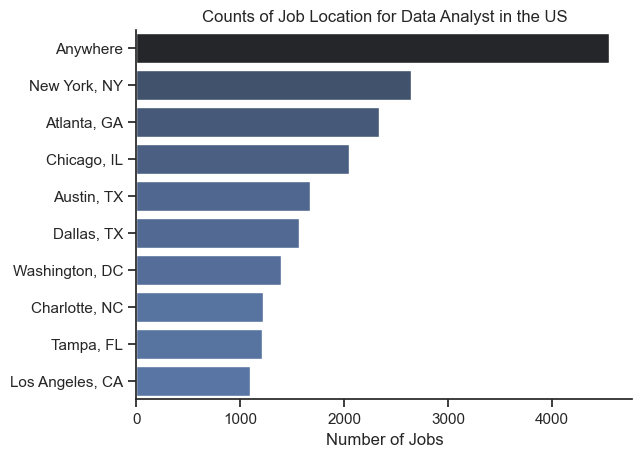

In [143]:
df_usa= df[(df['job_country']=='United States') & (df['job_title_short']=='Data Analyst')]
# df_usa= df[(df['job_country']=='India') & (df['job_title_short']=='Data Analyst')]


df_plot = df_usa['job_location'].value_counts().head(10).reset_index(name='Count')  


sns.set_theme(style='ticks')
sns.barplot(data = df_plot, x='Count', y='job_location' , hue='Count' , palette='dark:b_r', legend=False)
sns.despine()

plt.title("Counts of Job Location for Data Analyst in the US")
plt.xlabel("Number of Jobs")
plt.ylabel("")
plt.show()
# sns.barplot(data = df_plot, x='Count', y='job_location' , hue='Count' , palette='cubehelix_r')

### Looking for WFH req; Health Insurance; Degree Req in the US

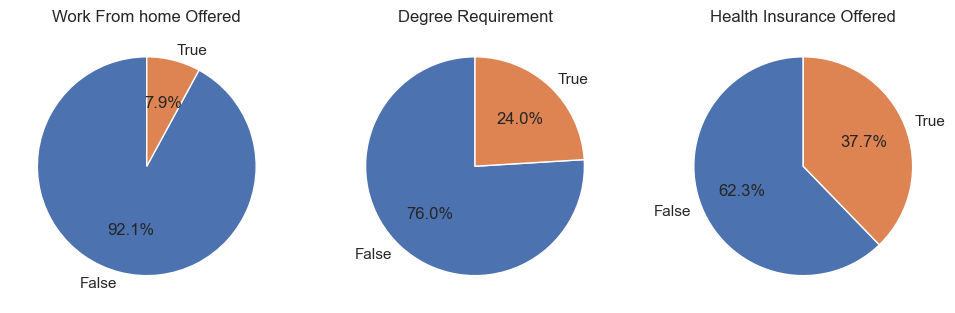

In [144]:
dict_col ={
    'job_work_from_home': 'Work From home Offered',
    'job_no_degree_mention': 'Degree Requirement',
    'job_health_insurance': 'Health Insurance Offered'
}

fig, ax = plt.subplots(1,3)
fig.set_size_inches((12,5))

for i, (key, value) in enumerate(dict_col.items()):
    ax[i].pie(df_usa[key].value_counts(), labels=['False', 'True'], autopct = '%1.1f%%', startangle=90)
    ax[i].set_title(value)

plt.show()

### Counts of Jobs offered by Company

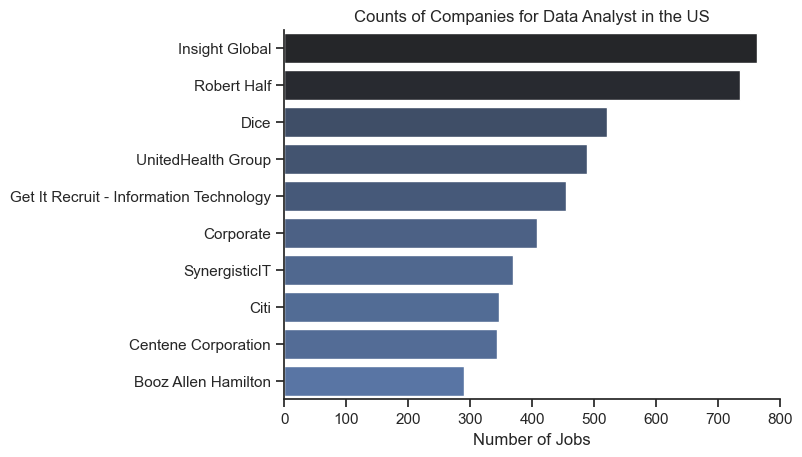

In [145]:
df_plot = df_usa['company_name'].value_counts().head(10).reset_index(name='Count')  


sns.set_theme(style='ticks')
sns.barplot(data = df_plot, x='Count', y='company_name' , hue='Count' , palette='dark:b_r', legend=False)
sns.despine()

plt.title("Counts of Companies for Data Analyst in the US")
plt.xlabel("Number of Jobs")
plt.ylabel("")
plt.show()


### Top 5 Skills that are in Demand for Data Analyst

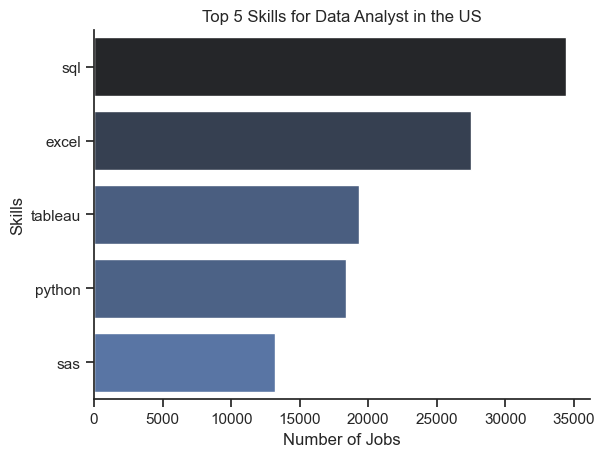

In [146]:
df_usa  =df_usa.explode('job_skills')

df_plot=df_usa['job_skills'].value_counts().head(5).reset_index(name = 'Count')


sns.set_theme(style='ticks')
sns.barplot(data = df_plot, x='Count', y='job_skills' , hue='Count' , palette='dark:b_r', legend=False)
sns.despine()

plt.title("Top 5 Skills for Data Analyst in the US")
plt.xlabel("Number of Jobs")
plt.ylabel("Skills")
plt.show()

### Trend of job postings throughout the Year

<Figure size 1000x1000 with 0 Axes>

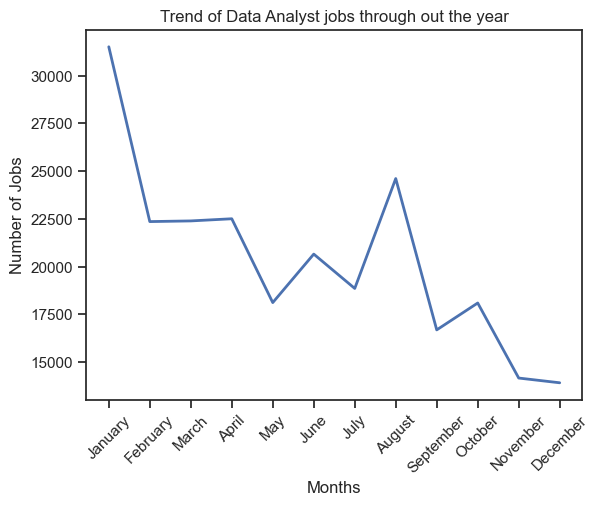

In [148]:

# Step 1: Extract month names from job_posted_date
df_usa['job_posted_month'] = df_usa['job_posted_date'].dt.strftime('%B')  ## Converts month number to full name

# Step 2: Create pivot table to count job postings per month
df_usa_piv = df_usa.pivot_table(index='job_posted_month', columns='job_title_short', aggfunc='size').reset_index()

# Step 3: Convert month names to month numbers for sorting
df_usa_piv['month_number'] = pd.to_datetime(df_usa_piv['job_posted_month'], format='%B').dt.month

# Step 4: Sort data by month number (ensures chronological order)
df_usa_piv.sort_values(by='month_number', inplace=True)

# Step 5: Set month names as index and drop the month number column
df_usa_piv.set_index('job_posted_month', inplace=True)
df_usa_piv.drop(columns='month_number', inplace=True)




plt.figure(figsize=(10,10))
df_usa_piv.plot(kind='line', legend=False, linewidth = 2)
plt.ylabel("Number of Jobs")
plt.xlabel("Months")
plt.title("Trend of Data Analyst jobs through out the year")
plt.xticks(ticks=range(len(df_usa_piv.index)), labels=df_usa_piv.index, rotation=45)
plt.show()
